<a href="https://colab.research.google.com/github/rafaeldajuda/IA-COLAB/blob/main/CLASSIFICARDOR_DE_AVALIACOES_BAG_OF_WORDS_WORD_CLOUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICANDO AVALIÇÕES DE TEXTOS

* base de dados: kaggle - buscape
* https://www.kaggle.com/datasets/fredericods/ptbr-sentiment-analysis-datasets

In [1]:
import pandas as pd

avaliacoes = pd.read_csv('b2w.csv')

In [2]:
avaliacoes.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [4]:
# removendo colunas que não precisamos
avaliacoes = avaliacoes.drop(['original_index', 'review_text_processed', 'review_text_tokenized', 'rating', 'kfold_polarity', 'kfold_rating'], axis=1)

In [5]:
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN


In [7]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_text  132373 non-null  object 
 1   polarity     116058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [8]:
avaliacoes['polarity'].value_counts()

,count
polarity,
1.0,80300
0.0,35758


In [12]:
avaliacoes['polarity'].unique().tolist()

[1.0, 0.0, nan]

* note que existe colunas sem valores na 'polarity'
* como a coluna 'polarity' é um valor binário não é uma má ideia remover as linhas sem valores, assim não iremos enviesar o modelo

In [15]:
# removendo tudo o que não é numero
avaliacoes.dropna(inplace=True, axis=0)

In [16]:
avaliacoes

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0
...,...,...
132367,"Ótimo jogo, um dos melhores que joguei. Entreg...",1.0
132368,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,1.0
132369,Eu estou muito chateado com isso gostaria que ...,0.0
132371,O produto anunciado no site dizia ser 100% al...,0.0


In [18]:
avaliacoes['polarity'].value_counts()

,count
polarity,
1.0,80300
0.0,35758


* 80300 linhas com avaliçãoes positivas
* 35758 linhas com avaliações negativas

In [19]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(avaliacoes.review_text, avaliacoes.polarity, test_size=0.2, random_state=71)

In [20]:
classe_teste

,polarity
10925,0.0
58227,1.0
33061,1.0
101270,1.0
88357,1.0
...,...
108682,0.0
83486,1.0
119762,0.0
21044,0.0


In [21]:
# from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()

# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(f'Acurácia: {acuracia}')

ValueError: could not convert string to float: 'O produto não foi entregue até o presente momento.'

## Bag of Words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Este produto é muito bom', 'Este produto é muito ruim']
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [23]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [25]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [26]:
matriz_esparsa

,bom,este,muito,produto,ruim
0,1,1,1,1,0
1,0,1,1,1,1


In [27]:
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 50508)


* 116058 - quantidade de linhas
* 50508 - quantidades de palavras únicas

In [28]:
vetorizar = CountVectorizer(max_features=100) # limitando para as X palavras mais recorrentes
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [29]:
from sklearn.linear_model import LogisticRegression

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes.polarity, random_state=71, stratify=avaliacoes.polarity)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
accuracy = regressao_logistica.score(teste, classe_teste)
print(f'accuracy: {accuracy}')

accuracy: 0.8873686024470102


In [30]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100) # limitando para as X palavras mais recorrentes
  bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes.polarity, random_state=71, stratify=avaliacoes.polarity)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)

In [31]:
print(treinar_modelo(avaliacoes, 'review_text', 'polarity'))

0.8873686024470102


## Word Cloud

https://github.com/amueller/word_cloud

Representação visual de palavras

In [34]:
from wordcloud import WordCloud

todas_as_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_as_palavras = ' '.join(todas_as_avaliacoes)

In [35]:
len(todas_as_avaliacoes)

116058

In [37]:
len(todas_as_palavras)

16570763

In [38]:
nuvem_de_palavras = WordCloud().generate(todas_as_palavras)

In [39]:
nuvem_de_palavras

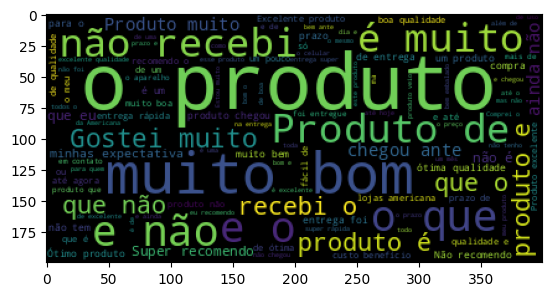

In [40]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_de_palavras)

In [41]:
nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_as_palavras)

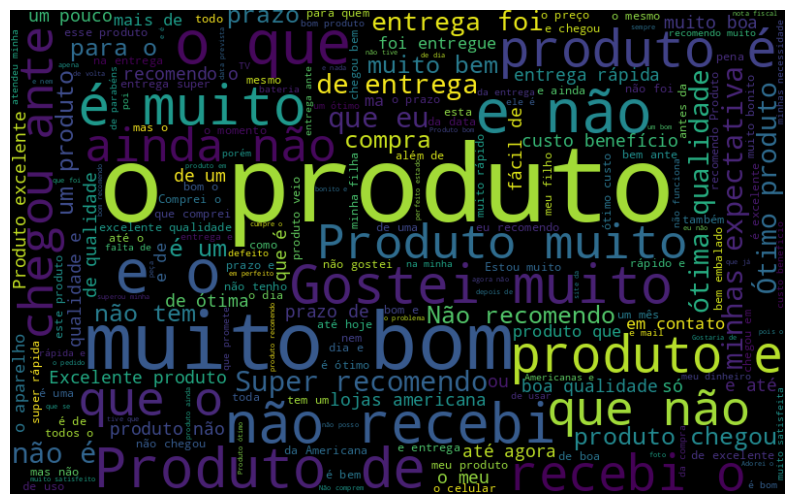

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

### Criando um word cloud para mensagens positivas e nagetivas

In [50]:
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query('polarity == 0')
  todas_as_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_as_palavras = ' '.join(todas_as_avaliacoes)
  nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_as_palavras) # collocations - remove ngrans (o, a, e, é, ...)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_de_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [51]:
def word_cloud_pos(dados, coluna_texto):
  texto_positivo = dados.query('polarity == 1')
  todas_as_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
  todas_as_palavras = ' '.join(todas_as_avaliacoes)
  nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_as_palavras) # collocations - remove ngrans ('o produto' para 'o' 'produto')

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_de_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

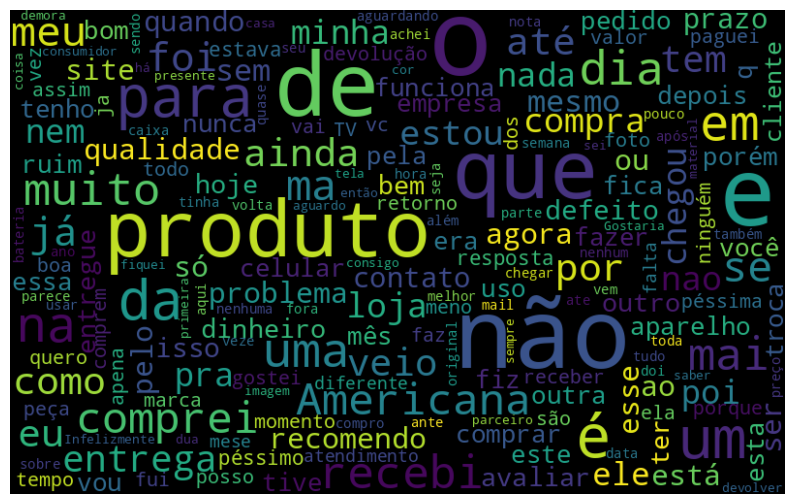

In [52]:
# nuvem de palavras negativa
word_cloud_neg(avaliacoes, 'review_text')

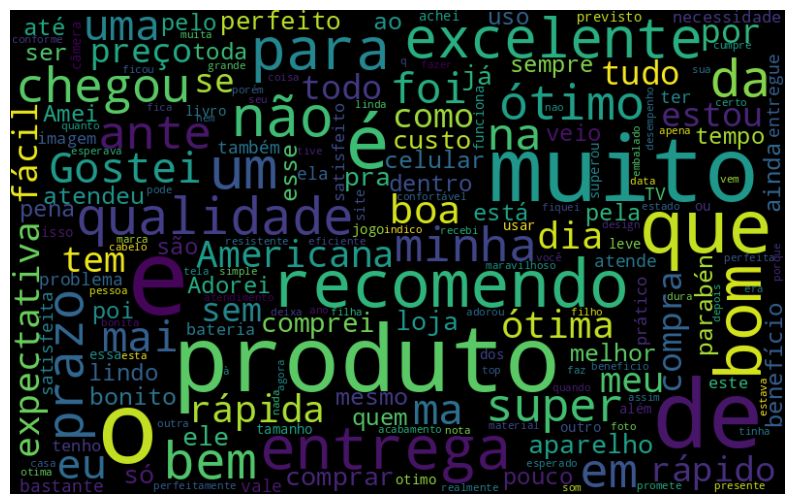

In [53]:
word_cloud_pos(avaliacoes, 'review_text')